In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

In [5]:
df = pd.read_excel("total_25_final.xlsx")

,num,region,title,category,time,price,detail,interest,chat,view,upload_datetime,upload_date,upload_ym,reup,region_gu
0,207637769,강남구 논현동,(가격인하)내열유리 커피잔 4인조세트,생활/가공식품,7달 전,12000,선물받고 한번도 사용하지 않은 제품입니다. 6인조인데 2개는 사용해서 4인조 세트 ...,9,0,179,2021-02-28 23:59:59,2021-02-28,2021-02,0,강남구
1,291413763,강남구 자곡동,려 약령원 프리미엄 탈모증상케어 샴푸+두피팩세트,뷰티/미용,끌올 1일 전,15000,일반 마트용이 아닌 아리따움에서 판매하는 제품입니다\n선물받았는데 기존에 사용하는게...,0,0,17,2021-09-29 23:59:59,2021-09-29,2021-09,1,강남구
2,189630202,강남구 개포1동,[설선물] 미개봉 스페셜 세트. AHC 브릴리언트 펄 스페셜 세트,뷰티/미용,8달 전,15000,기초화장품 세트입니다~\n선물로 들어온 완전 새 제품입니다.,0,1,35,2021-01-30 23:59:59,2021-01-30,2021-01,0,강남구
3,259532636,강남구 도곡2동,<이민정리/미개봉 새제품> 뚜아엘 핸드마스크 8매 + 틴케이스 세트,뷰티/미용,3달 전,29000,"정가 80000원, 2022년 4월까지인 핸드마스크 세트입니다. 쇼핑백도 함께 드리...",0,0,53,2021-06-30 23:59:59,2021-06-30,2021-06,0,강남구
4,172867728,강남구 역삼동,에어팟 2세대 유선충전 80000원,디지털기기,9달 전,80000,1년 조금 넘게 사용했어요\n배터리도 오래가고 소리도 잘 들리고 전화도 잘 되고 전...,2,1,51,2020-12-30 23:59:59,2020-12-30,2020-12,0,강남구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84097,257309304,중랑구 묵제2동,수저세트,생활/가공식품,끌올 3달 전,10000,"세신 퀸센스 수저 셋트\n어린이용과 티스푼, 포크도 있어 다양하게 쓸 수 있습니다...",0,2,176,2021-06-30 23:01:15,2021-06-30,2021-06,1,중랑구
84098,287433623,중랑구 중화제2동,견과류 선물세트,생활/가공식품,13일 전,25000,추석선물 받은 견과류세트 팔아요.\n사진보시면 여러가지가있네요.\n저는 견과류 안좋...,1,3,116,2021-09-17 23:01:15,2021-09-17,2021-09,0,중랑구
84099,234737607,중랑구 상봉동,양키캔들 향초 미니워머 선물세트 (캔들워머),가구/인테리어,5달 전,22000,현재 35000원정도에 판매되고 있는 캔들워머입니다! 워머는 한 번도 사용 안 했고...,1,1,109,2021-04-30 23:01:15,2021-04-30,2021-04,0,중랑구
84100,268201228,중랑구 면목제2동,미개봉 새상품)맘스네이처 별그레이 5종,유아동,끌올 2달 전,22000,빨리 처분 할 생각으로 가격 내려요,1,1,128,2021-07-30 23:01:15,2021-07-30,2021-07,1,중랑구


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83922 entries, 0 to 84101
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   num              83922 non-null  int64         
 1   region           83922 non-null  object        
 2   title            83922 non-null  object        
 3   category         83922 non-null  object        
 4   time             83922 non-null  object        
 5   price            83922 non-null  int64         
 6   detail           83922 non-null  object        
 7   interest         83922 non-null  int64         
 8   chat             83922 non-null  int64         
 9   view             83922 non-null  int64         
 10  upload_datetime  83922 non-null  datetime64[ns]
 11  upload_date      83922 non-null  datetime64[ns]
 12  upload_ym        83922 non-null  object        
 13  reup             83922 non-null  int64         
 14  region_gu        83922 non-null  objec

In [20]:
df['detail_len'] = df['detail'].apply(lambda x : len(str(x)))

In [64]:
df.detail = df.detail.apply(str)

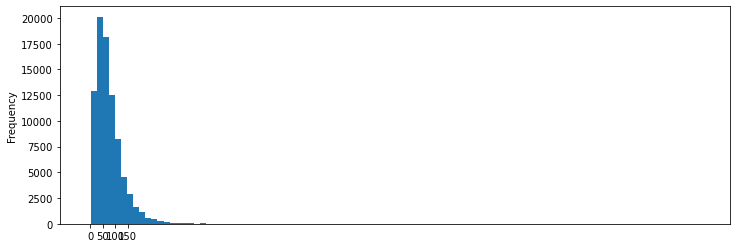

In [36]:
plt.figure(figsize=(12, 4))
df.detail_len.plot(kind='hist', bins=100)
plt.xticks(np.arange(0,200, step=50))
plt.show()

In [38]:
df[(df.detail_len > 0) & (df.detail_len > 150)]

,num,region,title,category,time,price,detail,interest,chat,view,upload_datetime,upload_date,upload_ym,reup,region_gu,detail_len
4,172867728,강남구 역삼동,에어팟 2세대 유선충전 80000원,디지털기기,9달 전,80000,1년 조금 넘게 사용했어요\n배터리도 오래가고 소리도 잘 들리고 전화도 잘 되고 전...,2,1,51,2020-12-30 23:59:59,2020-12-30,2020-12,0,강남구,310
12,211490143,강남구 수서동,더마하우스 멜라스톱 화이트닝~,여성잡화,6달 전,2000,"로션,스킨 세트입니다. \n각125ml 이며? 새제품입니다.\n단, 21년 8월20...",0,1,6,2021-03-30 23:59:59,2021-03-30,2021-03,0,강남구,184
17,187694852,강남구 역삼1동,사비니 타르투피 트러플 선물세트,생활/가공식품,끌올 8달 전,38000,사비니 타르투피 트러플 선물세트 미니 2호입니다. 블랙 트러플 올리브오일 100ml...,8,4,369,2021-01-30 23:59:59,2021-01-30,2021-01,1,강남구,168
22,287706238,강남구 일원2동,알레르망 에드윈2 차렵이불D 블루 4종세트,생활/가공식품,끌올 4일 전,200000,선물받은 알레르망 에드윈2 차렵이불 블루 4종세트(차렵이불+퀼팅패드+베개커버2장)\...,6,1,324,2021-09-26 23:59:59,2021-09-26,2021-09,1,강남구,357
28,223592815,강남구 청담동,인셀덤 8종 여행용 기초 세트 화장품 트레블 키트 휴대용 파우치 한정판 택포,뷰티/미용,5달 전,45000,선물받은 새제품입니다. 인셀덤 21년도 신형 한정판 기초 화장품 8종 세트예요. 구...,5,2,98,2021-04-30 23:59:59,2021-04-30,2021-04,0,강남구,261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84036,284825256,중랑구 묵동,플로렌스 꽃차 3구 선물 세트 팝니다. 무케렌시아 국화 복숭아 장미 꽃차 미개봉,생활/가공식품,끌올 13일 전,25000,"미개봉 새제품\n유통기한: 2022.11.30 까지\n국산 100%\n국화, 복숭아...",2,1,133,2021-09-17 23:01:15,2021-09-17,2021-09,1,중랑구,185
84057,282388971,중랑구 묵제1동,박이추 커피공장 보헤미안 커피 유나이트 로스터리 선물세트. 미개봉. 원두커피 유나이티드,생활/가공식품,끌올 23일 전,22000,미개봉 새제품\n[한박스 구성]\n1. 하우스블렌드 150g (브라질 콜롬비아 과테...,3,1,76,2021-09-07 23:01:15,2021-09-07,2021-09,1,중랑구,232
84064,191087768,중랑구 묵제1동,"청정원 선물세트 나눔A호(인터넷 최저가 33,000원)",생활/가공식품,8달 전,15000,청정원 나눔 A호\n인터넷 ❗최저가❗ 보다 훨씬 저렴해요~(사진첨부)\n반값도 안돼...,3,1,168,2021-01-30 23:01:15,2021-01-30,2021-01,0,중랑구,214
84085,223205369,중랑구 상봉동,상상블럭 시즌 2 (새상품)ㅡ아이들블럭(어린이날 선물로도 좋습니다^-^),유아동,5달 전,100000,요즘 핫한 상상블럭 팝니다~~~^-^\n포장박스채로 새상품이구요~~\n상상블럭 시즌...,0,1,35,2021-04-30 23:01:15,2021-04-30,2021-04,0,중랑구,289


In [65]:
# 한달 내 자료로 title 단어 학습 

with open ('detail_year.txt', 'w', encoding='utf8') as f:
    for row in df.itertuples():
        f.write(row.detail)
        f.write('\n')
        
from tokenizers import CharBPETokenizer
bpe = CharBPETokenizer(lowercase=True)
bpe.train(files='detail_year.txt', min_frequency=1, vocab_size=32000) # article 수가 21037개 이므로 넉넉하게 주었다. 


def tokenizer(text):
    enc = bpe.encode(text)
    for token in enc.tokens:
        token = token.replace('</w>', '')
        if len(token) > 1:
            yield token

In [21]:
# this_month = df[(df.upload_ym == '2021-09')]
# this_month.shape

(20970, 15)

In [42]:
text = df[['detail']]
text = text.dropna().reset_index(drop=True)
text

,detail
0,선물받고 한번도 사용하지 않은 제품입니다. 6인조인데 2개는 사용해서 4인조 세트 ...
1,일반 마트용이 아닌 아리따움에서 판매하는 제품입니다\n선물받았는데 기존에 사용하는게...
2,기초화장품 세트입니다~\n선물로 들어온 완전 새 제품입니다.
3,"정가 80000원, 2022년 4월까지인 핸드마스크 세트입니다. 쇼핑백도 함께 드리..."
4,1년 조금 넘게 사용했어요\n배터리도 오래가고 소리도 잘 들리고 전화도 잘 되고 전...
...,...
83917,"세신 퀸센스 수저 셋트\n어린이용과 티스푼, 포크도 있어 다양하게 쓸 수 있습니다..."
83918,추석선물 받은 견과류세트 팔아요.\n사진보시면 여러가지가있네요.\n저는 견과류 안좋...
83919,현재 35000원정도에 판매되고 있는 캔들워머입니다! 워머는 한 번도 사용 안 했고...
83920,빨리 처분 할 생각으로 가격 내려요


In [43]:
text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83922 entries, 0 to 83921
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   detail  83922 non-null  object
dtypes: object(1)
memory usage: 655.8+ KB


In [18]:
# stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

In [48]:
text['detail'] = text['detail'].apply(lambda x : list(tokenizer(x)))
# text['review'] = text['review'].apply(lambda x: [item for item in x if item not in stopwords])

In [49]:
print(text)

                                                  detail
0      [선물받고, 한번도, 사용하지, 않은, 제품입니다, 6인, 인데, 2개는, 사용해서...
1      [일반, 마트, 용이, 아닌, 아리, 에서, 판매하는, 제품입니다, 선물받았는데, ...
2                    [기초화장품, 세트입니다, 선물로, 들어온, 완전, 제품입니다]
3      [정가, 80000원, 2022년, 월까지인, 핸드, 마스크, 세트입니다, 쇼핑백도...
4      [1년, 조금, 넘게, 사용했어요, 배터리도, 오래, 가고, 소리도, 리고, 전화,...
...                                                  ...
83917  [퀸센스, 수저, 셋트, 어린이, 티스푼, 포크, 있어, 다양하게, 있습니다, 오늘...
83918  [추석선물, 받은, 견과류, 세트, 팔아요, 사진보시면, 여러, 가지, 있네요, 저...
83919  [현재, 35, 000원정도에, 판매되고, 있는, 캔들워머, 입니다, 워머는, 번도...
83920                            [빨리, 처분, 생각으로, 가격, 내려요]
83921  [천연, 모시, 이고, 반팔, 반바지, 세트에요, 몸에, 달라, 붙지, 않고, 촉감...

[83922 rows x 1 columns]


In [50]:
# 역토큰화 
detokenized_doc = []
for i in range(len(text)):
    t = ' '.join(text.detail[i])
    detokenized_doc.append(t)

In [51]:
text = pd.Series(detokenized_doc, name='detail').to_frame()

In [52]:
text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83922 entries, 0 to 83921
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   detail  83922 non-null  object
dtypes: object(1)
memory usage: 655.8+ KB


In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features= 300, tokenizer=tokenizer) # 상위 1,000개의 단어를 보존 
X = vectorizer.fit_transform(text['detail'])
X.shape # TF-IDF 행렬의 크기 확인

(83922, 300)

# 토픽모델링

In [54]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=20,learning_method='online',random_state=777,max_iter=1)

In [55]:
lda_top=lda_model.fit_transform(X)

In [56]:
print(lda_model.components_)
print(lda_model.components_.shape) 

[[5.00000352e-02 5.00000349e-02 5.00021576e-02 ... 5.00000382e-02
  5.00000372e-02 5.00000403e-02]
 [5.00000349e-02 5.00000654e-02 5.00000378e-02 ... 5.00000400e-02
  5.00000494e-02 5.00000402e-02]
 [5.00000449e-02 6.60947120e+02 5.00000786e-02 ... 5.00000520e-02
  5.00000351e-02 2.99821795e+02]
 ...
 [5.00000282e-02 5.00000569e-02 5.00000667e-02 ... 5.00000442e-02
  2.58513681e+01 5.00000499e-02]
 [5.00000326e-02 5.00000448e-02 5.00000657e-02 ... 5.00000344e-02
  5.00000378e-02 5.00000361e-02]
 [5.00000322e-02 5.00000414e-02 5.00000273e-02 ... 2.95122026e+02
  5.00000486e-02 5.00000451e-02]]
(20, 300)


In [57]:
terms = vectorizer.get_feature_names() # 단어 집합. 1,000개의 단어가 저장됨.

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(lda_model.components_,terms)

Topic 1: [('스팸', 1129.1), ('팔아요', 1105.72), ('추석', 665.2), ('선물세트', 539.61), ('선물용으로도', 417.01)]
Topic 2: [('인터넷', 781.78), ('최저가', 702.62), ('좋은', 618.63), ('포함', 561.63), ('상태', 488.52)]
Topic 3: [('핸드크림', 779.81), ('연락주세요', 757.21), ('000원', 660.95), ('세트에요', 617.06), ('필요하신분', 605.94)]
Topic 4: [('팝니다', 1769.15), ('세트', 1202.14), ('선물받은', 999.87), ('입니다', 869.76), ('많아', 394.13)]
Topic 5: [('한번도', 843.95), ('선물받고', 759.18), ('사용하지', 609.7), ('안녕하세요', 466.83), ('교환', 454.54)]
Topic 6: [('새제품', 1118.23), ('선물용', 579.88), ('가능해요', 508.66), ('완전', 507.53), ('아기', 400.25)]
Topic 7: [('쇼핑백', 782.09), ('제품입니다', 594.12), ('드려요', 590.17), ('가능', 548.71), ('함께', 459.9)]
Topic 8: [('새상품', 1429.62), ('내놓습니다', 644.2), ('올립니다', 538.9), ('상품입니다', 528.67), ('해서', 503.83)]
Topic 9: [('1개', 730.85), ('셋트', 664.1), ('싸게', 501.0), ('거의', 417.06), ('정품', 385.12)]
Topic 10: [('선물세트', 1826.12), ('근처', 517.58), ('3개', 501.01), ('10', 434.55), ('커피', 381.05)]
Topic 11: [('새상품입니다', 1555.25), ('선물세트입니다', 113

In [66]:

cv = CountVectorizer(max_features=300, tokenizer=tokenizer)
dtm = cv.fit_transform(df.detail)

wc = pd.DataFrame({'단어': cv.get_feature_names(), '빈도':dtm.sum(axis=0).flat})
wc.sort_values('빈도', ascending=False)

,단어,빈도
219,입니다,14252
160,세트,13874
271,판매합니다,13565
140,선물,12411
249,직거래,9581
...,...,...
254,집들이,618
9,18,617
126,살짝,611
108,박스에,610


In [67]:
from sklearn.decomposition import NMF
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize;


In [68]:
norm = normalize(dtm, norm='l1', axis=1)

In [69]:
nmf = NMF(n_components=10)
nmf.fit(norm)

# pca = PCA(n_components=10)
# pca.fit(norm)

C:\Users\hmkang\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


NMF(n_components=10)

In [70]:
num_topics = 10;

In [71]:
def get_nmf_topics(model, n_top_words):
    
    #the word ids obtained need to be reverse-mapped to the words so we can print the topic names.
    feat_names = cv.get_feature_names()
    
    word_dict = {};
    for i in range(num_topics):
        
        #for each topic, obtain the largest values, and add the words they map to into the dictionary.
        words_ids = model.components_[i].argsort()[:-20 - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;
    
    return pd.DataFrame(word_dict);

In [72]:
get_nmf_topics(nmf, 20)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10
0,세트,선물세트,입니다,판매합니다,세트입니다,직거래,선물,새상품,선물세트입니다,팝니다
1,선물받은,스팸,선물받은,선물받았는데,선물받은,가능합니다,받았는데,미개봉,유통기한,선물받은
2,새제품,팔아요,새제품,선물받은,선물로,원합니다,받은,그대로,스팸,선물받았는데
3,새상품입니다,새상품입니다,유통기한,선물로,선물받았는데,합니다,새상품입니다,좋아요,받은,선물로
4,팔아요,미개봉,그대로,세트로,선물용으로,유통기한,팔아요,새상품입니다,미개봉,스팸
5,핸드크림,유통기한,선물로,새제품,좋아요,새상품입니다,그대로,선물받은,있습니다,유통기한
6,2개,양키캔들,있습니다,저렴하게,새상품입니다,가능,받아서,유통기한,선물받은,새제품
7,3종,동원,합니다,받았는데,받은,근처,내놓습니다,선물용으로,새상품입니다,세트로
8,미개봉,새제품,선물용으로,있어서,선물받고,원해요,세트로,판매해요,양키캔들,싸게
9,2종,추석,셋트,가능합니다,한번도,택배,있어서,쇼핑백,선물로,많아서
